In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder 


import Draft_wrangle as w

# Acquire

In [2]:
# Call the function to acquire the test data
# Order Matters 
# (Outpatient, inpatient, beneficiary, df)
test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()

# Call the function to acquire the train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


#### Taking a look at the data 

In [3]:
# Verify 
test_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [4]:
# Verify 
test_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Verify 
test_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [6]:
# Verify 
test_df.head(3)

,Provider
0,PRV51002
1,PRV51006
2,PRV51009


In [7]:
# Verify 
train_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [8]:
# Verify 
train_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verify 
train_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
# Verify 
train_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [11]:
# list of all the data frames 
list_of_dataframes = [test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df]

# List of lables for the dataframes 
list_of_dataframes_name = ['test_outpatient_df', 'test_inpatient_df', 'test_beneficiary_df', 'test_df']

sep_line = '=' * 40

# Create a forloop to zip lables and DataFrame shape 
for dataframe, name in zip(list_of_dataframes, list_of_dataframes_name):
    print(f'Name: {name}')
    print(f'Shape: {dataframe.shape}')
    print(sep_line)

Name: test_outpatient_df
Shape: (125841, 27)
Name: test_inpatient_df
Shape: (9551, 30)
Name: test_beneficiary_df
Shape: (63968, 25)
Name: test_df
Shape: (1353, 1)


    - Takeaways 
- can see that they have the same number of columns
- Test data is smaller as expected 

# Prepare

In [12]:
'''
test_df = test_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
frames = [test_df, train_df]
fraud_df = pd.concat(frames, ignore_index=True)
'''

'\ntest_df = test_df.reset_index(drop=True)\ntrain_df = train_df.reset_index(drop=True)\nframes = [test_df, train_df]\nfraud_df = pd.concat(frames, ignore_index=True)\n'

In [13]:
'''
frames = [test_df, train_df]

fraud_df = pd.concat(frames)


fraud_df = fraud_df.reset_index(drop=True)

'''

'\nframes = [test_df, train_df]\n\nfraud_df = pd.concat(frames)\n\n\nfraud_df = fraud_df.reset_index(drop=True)\n\n'

In [14]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')

# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)

# Display the sorted dataframe
print(fraud_df)


      Provider PotentialFraud
0     PRV51001             No
1     PRV51002            NaN
2     PRV51003            Yes
3     PRV51004             No
4     PRV51005            Yes
...        ...            ...
6758  PRV57759             No
6759  PRV57760             No
6760  PRV57761             No
6761  PRV57762             No
6762  PRV57763             No

[6763 rows x 2 columns]


In [15]:
fraud_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [16]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        6763 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 105.8+ KB


In [17]:
fraud_df.shape

(6763, 2)

### Combind inpatiant data

In [18]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Verify 
w.DataFrame_shape(train_inpatient_df, test_inpatient_df, inpatient_df)

Sum of both train and test -> 50025
Sum of new DataFrame -> 50025


In [20]:
inpatient_df.ClaimStartDt.min()

'2008-11-27'

In [21]:
inpatient_df.ClaimStartDt.max()

'2009-12-31'

### Combind outpatiant data

In [22]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [23]:
# Verify 
w.DataFrame_shape(train_outpatient_df, test_outpatient_df, outpatient_df)

Sum of both train and test -> 643578
Sum of new DataFrame -> 643578


### Combind beneficiary data

In [24]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [25]:
# Verify 
w.DataFrame_shape(train_beneficiary_df, test_beneficiary_df, beneficiary_df)

Sum of both train and test -> 202524
Sum of new DataFrame -> 202524


### look at the test and train data (target Variable)

In [26]:
# 
train_df.info()
print(sep_line)
print(sep_line)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [27]:
print(train_df.PotentialFraud.value_counts())
print(sep_line)
print(train_df.PotentialFraud.value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


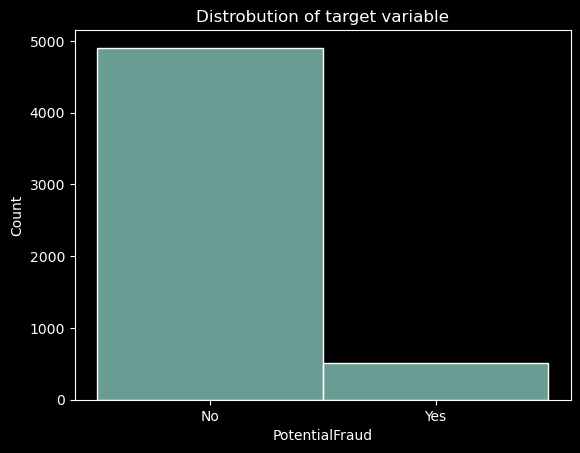

In [28]:
sns.histplot(data = train_df, x="PotentialFraud")
plt.title('Distrobution of target variable')
plt.show()

# Notes for beneficiary dataframe 

- Lowercase column names 

In [29]:
# lowercase all the column names
beneficiary_df.columns = beneficiary_df.columns.str.lower()

- looking at data types 

In [30]:
# taking a look at data types and verify lowercase columns 
beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202524 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   beneid                           202524 non-null  object
 1   dob                              202524 non-null  object
 2   dod                              1995 non-null    object
 3   gender                           202524 non-null  int64 
 4   race                             202524 non-null  int64 
 5   renaldiseaseindicator            202524 non-null  object
 6   state                            202524 non-null  int64 
 7   county                           202524 non-null  int64 
 8   noofmonths_partacov              202524 non-null  int64 
 9   noofmonths_partbcov              202524 non-null  int64 
 10  chroniccond_alzheimer            202524 non-null  int64 
 11  chroniccond_heartfailure         202524 non-null  int64 
 12  chroniccond_kidneydise

- Looking at the column values  

In [31]:
columns_in_beneficiaries = beneficiary_df.columns

sep_line = '=' * 60 

for col in columns_in_beneficiaries:
    print(beneficiary_df[col].value_counts())
    print(sep_line)

beneid
BENE11001     2
BENE134006    2
BENE133998    2
BENE69371     2
BENE69368     2
             ..
BENE76633     1
BENE76631     1
BENE76630     1
BENE76628     1
BENE159193    1
Name: count, Length: 148072, dtype: int64
dob
1940-03-01    791
1939-10-01    772
1941-10-01    764
1939-03-01    756
1939-04-01    753
             ... 
1982-08-01     13
1974-04-01     13
1979-01-01     12
1983-02-01     12
1978-11-01      9
Name: count, Length: 900, dtype: int64
dod
2009-12-01    274
2009-09-01    237
2009-10-01    231
2009-08-01    218
2009-11-01    208
2009-07-01    190
2009-06-01    166
2009-05-01    160
2009-04-01    127
2009-03-01    114
2009-02-01     69
2009-01-01      1
Name: count, dtype: int64
gender
2    115827
1     86697
Name: count, dtype: int64
race
1    171162
2     19922
3      7206
5      4234
Name: count, dtype: int64
renaldiseaseindicator
0    172386
Y     30138
Name: count, dtype: int64
state
5     15864
10    14855
45    14063
33    12346
14     8693
39     8659
36

    - Takeaways

- DOB - is an object and needs to be a datetime value 
- DOD - is an object and needs to be a datetime value 
- gender - is an int and needs to be a bool value
- race - is an int and needs to be a bool value
- renaldiseaseindicator - is an object and needs to be a bool value 
- chroniccond_alzheimer - is an int and needs to be a bool value
- chroniccond_heartfailure - is an int and needs to be a bool value
- chroniccond_kidneydisease - is an int and needs to be a bool value
- chroniccond_cancer - is an int and needs to be a bool value
- chroniccond_obstrpulmonary - is an int and needs to be a bool value
- chroniccond_depression - is an int and needs to be a bool value
- chroniccond_diabetes - is an int and needs to be a bool value
- chroniccond_ischemicheart - is an int and needs to be a bool value
- chroniccond_osteoporasis - is an int and needs to be a bool value
- chroniccond_rheumatoidarthritis - is an int and needs to be a bool value
- chroniccond_stroke - is an int and needs to be a bool value

    
    - Possible change 

- opannualdeductibleamt - in an int and possibly change into an float value
- opannualreimbursementamt - in an int and possibly change into an float value
- ipannualdeductibleamt - in an int and possibly change into an float value
- ipannualreimbursementamt - in an int and possibly change into an float value

### Encode Gender using OneHotEncoder

In [32]:
# this created 4 new columns 
# Not what I wanted 

beneficiary_df = w.beneficiary_OneHotLable_encode(beneficiary_df)


### encode race using preprocessing lable encoder

In [33]:
# Tested this out for race column and it works the way I want to.  
'''
# Import Lable Encoder from sklearn.preprocessing
label_encoder = LabelEncoder()

# specify 
beneficiary_df['race'] = label_encoder.fit_transform(beneficiary_df['race'])
'''

"\n# Import Lable Encoder from sklearn.preprocessing\nlabel_encoder = LabelEncoder()\n\n# specify \nbeneficiary_df['race'] = label_encoder.fit_transform(beneficiary_df['race'])\n"

In [34]:
w.beneficiary_lable_encode(beneficiary_df)

In [35]:
beneficiary_df.head(3)

,beneid,dob,dod,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,...,chroniccond_rheumatoidarthritis,chroniccond_stroke,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,race_0,race_1,race_2,race_3
0,BENE11001,1943-01-01,NaN,0,0,0,39,230,12,12,...,0,0,36000,3204,60,70,1,0,0,0
0,BENE11001,1943-01-01,NaN,0,0,0,39,230,12,12,...,0,0,36000,3204,60,70,1,0,0,0
1,BENE11002,1936-09-01,NaN,1,0,0,39,280,12,12,...,1,1,0,0,30,50,1,0,0,0


In [36]:
col_list = ['gender', 'race', 'renaldiseaseindicator',
				'chroniccond_alzheimer', 'chroniccond_heartfailure',
				'chroniccond_kidneydisease', 'chroniccond_cancer',
				'chroniccond_obstrpulmonary', 'chroniccond_depression',
				'chroniccond_diabetes', 'chroniccond_ischemicheart',
				'chroniccond_osteoporasis', 'chroniccond_rheumatoidarthritis',
				'chroniccond_stroke']

# Verify values have changed 
for col in col_list:
    print(beneficiary_df[col].value_counts())
    print(sep_line)

gender
1    115827
0     86697
Name: count, dtype: int64
race
0    171162
1     19922
2      7206
3      4234
Name: count, dtype: int64
renaldiseaseindicator
0    172386
1     30138
Name: count, dtype: int64
chroniccond_alzheimer
1    132994
0     69530
Name: count, dtype: int64
chroniccond_heartfailure
0    103108
1     99416
Name: count, dtype: int64
chroniccond_kidneydisease
1    136159
0     66365
Name: count, dtype: int64
chroniccond_cancer
1    177111
0     25413
Name: count, dtype: int64
chroniccond_obstrpulmonary
1    152144
0     50380
Name: count, dtype: int64
chroniccond_depression
1    128129
0     74395
Name: count, dtype: int64
chroniccond_diabetes
0    125177
1     77347
Name: count, dtype: int64
chroniccond_ischemicheart
0    139530
1     62994
Name: count, dtype: int64
chroniccond_osteoporasis
1    145534
0     56990
Name: count, dtype: int64
chroniccond_rheumatoidarthritis
1    148881
0     53643
Name: count, dtype: int64
chroniccond_stroke
1    185783
0     16741
Nam

    - takeaways 
- Lable encoder took the existing column and replaced the values between 0 and n_classes-1.
- new values are still ints and need to be bools 

### convert dob and dod to datetime values 

In [37]:
# convert dod & dob to datetime values 
beneficiary_df['dod'] = pd.to_datetime(beneficiary_df['dod'])
beneficiary_df['dob'] = pd.to_datetime(beneficiary_df['dob'])

In [38]:
# Verify 
beneficiary_df.dod.info()
print(sep_line)
beneficiary_df.dob.info()

<class 'pandas.core.series.Series'>
Index: 202524 entries, 0 to 138555
Series name: dod
Non-Null Count  Dtype         
--------------  -----         
1995 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB
<class 'pandas.core.series.Series'>
Index: 202524 entries, 0 to 138555
Series name: dob
Non-Null Count   Dtype         
--------------   -----         
202524 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


### Create new columns for the decsased 

In [39]:
# created a new column for the deceased 
beneficiary_df['deceased'] = np.where((beneficiary_df['dod'].replace(np.nan,'rep') == 'rep'), 0, 1)

In [40]:
# Verify 
beneficiary_df.columns

Index(['beneid', 'dob', 'dod', 'gender', 'race', 'renaldiseaseindicator',
       'state', 'county', 'noofmonths_partacov', 'noofmonths_partbcov',
       'chroniccond_alzheimer', 'chroniccond_heartfailure',
       'chroniccond_kidneydisease', 'chroniccond_cancer',
       'chroniccond_obstrpulmonary', 'chroniccond_depression',
       'chroniccond_diabetes', 'chroniccond_ischemicheart',
       'chroniccond_osteoporasis', 'chroniccond_rheumatoidarthritis',
       'chroniccond_stroke', 'ipannualreimbursementamt',
       'ipannualdeductibleamt', 'opannualreimbursementamt',
       'opannualdeductibleamt', 'race_0', 'race_1', 'race_2', 'race_3',
       'deceased'],
      dtype='object')

### Create column for age 

In [41]:
# create new column for age 
beneficiary_df['age'] = round(((beneficiary_df['dod'] - beneficiary_df['dob']).dt.days)/365)

In [42]:
# Verify  
beneficiary_df.head()

,beneid,dob,dod,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,...,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,race_0,race_1,race_2,race_3,deceased,age
0,BENE11001,1943-01-01,NaT,0,0,0,39,230,12,12,...,36000,3204,60,70,1,0,0,0,0,NaN
0,BENE11001,1943-01-01,NaT,0,0,0,39,230,12,12,...,36000,3204,60,70,1,0,0,0,0,NaN
1,BENE11002,1936-09-01,NaT,1,0,0,39,280,12,12,...,0,0,30,50,1,0,0,0,0,NaN
1,BENE11007,1940-09-01,2009-12-01,0,1,0,45,610,12,12,...,0,0,1490,160,1,0,0,0,1,69.0
2,BENE11003,1936-08-01,NaT,0,0,0,52,590,12,12,...,0,0,90,40,1,0,0,0,0,NaN


In [43]:

beneficiary_df['age'] = beneficiary_df['age'].fillna(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d') - beneficiary_df['dob']).dt.days)/365)
beneficiary_df['age'] = beneficiary_df['age'].astype(int)

In [44]:
beneficiary_df['dod'] = beneficiary_df['dod'].fillna('2010-01-01')


In [45]:
beneficiary_df.head()

,beneid,dob,dod,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,...,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,race_0,race_1,race_2,race_3,deceased,age
0,BENE11001,1943-01-01,2010-01-01,0,0,0,39,230,12,12,...,36000,3204,60,70,1,0,0,0,0,66
0,BENE11001,1943-01-01,2010-01-01,0,0,0,39,230,12,12,...,36000,3204,60,70,1,0,0,0,0,66
1,BENE11002,1936-09-01,2010-01-01,1,0,0,39,280,12,12,...,0,0,30,50,1,0,0,0,0,73
1,BENE11007,1940-09-01,2009-12-01,0,1,0,45,610,12,12,...,0,0,1490,160,1,0,0,0,1,69
2,BENE11003,1936-08-01,2010-01-01,0,0,0,52,590,12,12,...,0,0,90,40,1,0,0,0,0,73


In [46]:
beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202524 entries, 0 to 138555
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   beneid                           202524 non-null  object        
 1   dob                              202524 non-null  datetime64[ns]
 2   dod                              202524 non-null  datetime64[ns]
 3   gender                           202524 non-null  int64         
 4   race                             202524 non-null  int64         
 5   renaldiseaseindicator            202524 non-null  int64         
 6   state                            202524 non-null  int64         
 7   county                           202524 non-null  int64         
 8   noofmonths_partacov              202524 non-null  int64         
 9   noofmonths_partbcov              202524 non-null  int64         
 10  chroniccond_alzheimer            202524 non-null 

### Created columns for year, monnth and day for date of birth

In [47]:
beneficiary_df['dob_year'] = beneficiary_df['dob'].dt.year
beneficiary_df['dob_month'] = beneficiary_df['dob'].dt.month
beneficiary_df['dob_day'] = beneficiary_df['dob'].dt.day

### Drop bod and dod columns 

In [48]:
beneficiary_df = beneficiary_df.drop(['dob', 'dod'], axis=1)  # Assign the result back to the dataframe


### Create columns for total reimbursment and deductible 

In [49]:
beneficiary_df['total_reimbursed_amt'] = beneficiary_df['ipannualreimbursementamt'] + beneficiary_df['opannualreimbursementamt']	
beneficiary_df['total_deductible_amt'] = beneficiary_df['ipannualdeductibleamt'] + beneficiary_df['opannualreimbursementamt'] 


In [50]:
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,race_1,race_2,race_3,deceased,age,dob_year,dob_month,dob_day,total_reimbursed_amt,total_deductible_amt
0,BENE11001,0,0,0,39,230,12,12,0,1,...,0,0,0,0,66,1943,1,1,36060,3264
0,BENE11001,0,0,0,39,230,12,12,0,1,...,0,0,0,0,66,1943,1,1,36060,3264
1,BENE11002,1,0,0,39,280,12,12,1,1,...,0,0,0,0,73,1936,9,1,30,30
1,BENE11007,0,1,0,45,610,12,12,0,0,...,0,0,0,1,69,1940,9,1,1490,1490
2,BENE11003,0,0,0,52,590,12,12,0,1,...,0,0,0,0,73,1936,8,1,90,90


In [51]:
beneficiary_df.chroniccond_alzheimer.info()

<class 'pandas.core.series.Series'>
Index: 202524 entries, 0 to 138555
Series name: chroniccond_alzheimer
Non-Null Count   Dtype
--------------   -----
202524 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


In [52]:
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,race_1,race_2,race_3,deceased,age,dob_year,dob_month,dob_day,total_reimbursed_amt,total_deductible_amt
0,BENE11001,0,0,0,39,230,12,12,0,1,...,0,0,0,0,66,1943,1,1,36060,3264
0,BENE11001,0,0,0,39,230,12,12,0,1,...,0,0,0,0,66,1943,1,1,36060,3264
1,BENE11002,1,0,0,39,280,12,12,1,1,...,0,0,0,0,73,1936,9,1,30,30
1,BENE11007,0,1,0,45,610,12,12,0,0,...,0,0,0,1,69,1940,9,1,1490,1490
2,BENE11003,0,0,0,52,590,12,12,0,1,...,0,0,0,0,73,1936,8,1,90,90


# test functions 

In [53]:
# Adding beneficiary data togehter to form a new DataFrame 
function_test_beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
function_test_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [54]:
# Run the prep fuction 
function_test_beneficiary_df = w.prep_beneficiary_data(function_test_beneficiary_df)

# Check 
function_test_beneficiary_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,deceased,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day
0,BENE11001,1,1,0,39,230,12,12,1,2,...,3204,60,70,0,66,36060,3264,1943,1,1
1,BENE11002,2,1,0,39,280,12,12,2,2,...,0,30,50,0,73,30,30,1936,9,1
2,BENE11003,1,1,0,52,590,12,12,1,2,...,0,90,40,0,73,90,90,1936,8,1


In [55]:
# Run the lable encode function 
w.beneficiary_lable_encode(function_test_beneficiary_df)

# Check 
function_test_beneficiary_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,deceased,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day
0,BENE11001,0,0,0,39,230,12,12,0,1,...,3204,60,70,0,66,36060,3264,1943,1,1
1,BENE11002,1,0,0,39,280,12,12,1,1,...,0,30,50,0,73,30,30,1936,9,1
2,BENE11003,0,0,0,52,590,12,12,0,1,...,0,90,40,0,73,90,90,1936,8,1


In [56]:
# Run one hot lable function 
function_test_beneficiary_df = w.beneficiary_OneHotLable_encode(function_test_beneficiary_df)

# Check 
function_test_beneficiary_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0


In [57]:
function_test_beneficiary_df.race.value_counts()


race
0    171162
1     19922
2      7206
3      4234
Name: count, dtype: int64

- prepare inpatient data 


In [58]:
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.head(3)

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3


- prepare outpatiant data 

In [60]:
outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [61]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.head(3)



,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0


# Explore 


In [62]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # was in my prepare.py 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

- Join all dataframes

In [63]:
df = pd.merge(beneficiary_df, outpatient_df, on='beneid')
df = pd.merge(df, inpatient_df, on='beneid')




In [64]:
df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_6_y,clmdiagnosiscode_7_y,clmdiagnosiscode_8_y,clmdiagnosiscode_9_y,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration_y,numphysicians
0,BENE11001,0,0,0,39,230,12,12,0,1,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,0,0,0,39,230,12,12,0,1,...,32723,00000,00000,00000,00000,000,000,000,3,3
3,BENE11001,0,0,0,39,230,12,12,0,1,...,71590,2724,19889,5849,00000,000,000,000,6,3
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3


In [69]:
df.race_0.info()

<class 'pandas.core.series.Series'>
RangeIndex: 440686 entries, 0 to 440685
Series name: race_0
Non-Null Count   Dtype
--------------   -----
440686 non-null  int64
dtypes: int64(1)
memory usage: 3.4 MB


In [66]:
w.summarize_outliers(df)

Shape of Data: 
(440686, 82)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440686 entries, 0 to 440685
Data columns (total 82 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   beneid                           440686 non-null  object        
 1   gender                           440686 non-null  int64         
 2   race                             440686 non-null  int64         
 3   renaldiseaseindicator            440686 non-null  int64         
 4   state                            440686 non-null  int64         
 5   county                           440686 non-null  int64         
 6   noofmonths_partacov              440686 non-null  int64         
 7   noofmonths_partbcov              440686 non-null  int64         
 8   chroniccond_alzheimer            440686 non-null  int64         
 9   chroniccond_heartfailure         440686 non-null  int64         
 10  chronicc

In [67]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
print(df.provider_x.value_counts())
print(sep_line)
print(df.provider_y.value_counts())

provider_x
PRV51459    5435
PRV53797    3222
PRV51574    2901
PRV53918    2572
PRV52080    2563
            ... 
PRV56998       1
PRV55129       1
PRV52456       1
PRV55885       1
PRV53156       1
Name: count, Length: 5740, dtype: int64
provider_y
PRV53866    6494
PRV52019    4792
PRV52618    3906
PRV55462    3454
PRV51407    3003
            ... 
PRV55118       1
PRV51806       1
PRV56717       1
PRV54155       1
PRV51375       1
Name: count, Length: 2575, dtype: int64


In [ ]:
def merge_all_data(dfb, dfi, dfo, dff):
    df = pd.merge(dfb, dfi, on='beneid')
    df = pd.merge(df, dfo, on='beneid')
    df = pd.merge(df, dff, on='provider_x')
    return df

In [ ]:
df = merge_all_data(beneficiary_df, inpatient_df, outpatient_df, fraud_df)

KeyError: 'provider_x'